In [5]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
from scipy import stats
import sys
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tueplots import axes, bundles

# Increase the resolution of all the plots below
bundles.beamer_moml()
plt.rcParams.update({"figure.dpi": 300,"figure.facecolor":"w","figure.figsize": (15,10)})

from src.utl import remove_outliers_df
from src.config import dir_prep, dir_plots


## set path and merge data

In [28]:
dat_pupil = pd.read_csv(Path.joinpath(dir_prep,"all_trials_pupil.csv"), index_col=False)
dat_fsr = pd.read_csv(Path.joinpath(dir_prep,"all_trials_fsr.csv"), index_col=False)

list(dat_pupil.columns)

['ID',
 'Trial n',
 'Feedback type',
 'Feedback angle',
 'Pupil size',
 'Percentage bad pupil samples',
 'Group']

In [29]:
full = pd.merge(dat_fsr, dat_pupil, on=["ID","Trial n","Group","Feedback type","Feedback angle"])
full = full.loc[:,~full.columns.str.startswith('Unnamed')]
list(full.columns)

['ID',
 'Trial n',
 'Feedback type',
 'Feedback angle',
 'Power [4-12]',
 'Power [1-3]',
 'Group',
 'Pupil size',
 'Percentage bad pupil samples']

## filter data for t-tests

In [52]:
tt_power = full.copy()
cfg_out_ppl_per = 30

tt_pupil = tt.loc[tt["Percentage bad pupil samples"] < cfg_out_ppl_per,:]

### clean from bad pupil data and run test for each group for each condition

In [56]:
pat = tt_power.groupby("Group").get_group("p")
pat = pat[pat["Power [4-12]"].notna()]

ppl_ao_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "ao"),"Power [4-12]"]
ppl_ao_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "ao"),"Power [4-12]"]
t_ao, p_ao = stats.mannwhitneyu(ppl_ao_high,ppl_ao_low)

ppl_va_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "va"),"Power [4-12]"]
ppl_va_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "va"),"Power [4-12]"]
t_va, p_va = stats.mannwhitneyu(ppl_va_high,ppl_va_low)

ppl_vo_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "vo"),"Power [4-12]"]
ppl_vo_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "vo"),"Power [4-12]"]
t_vo, p_vo = stats.mannwhitneyu(ppl_vo_high,ppl_vo_low)

print(f'High-low differences for patients for Power [4-12] visual only condition is t:{t_ao:.2f}, p:{p_ao:.3f}')
print(f'High-low differences for patients for Power [4-12] visual-auditive condition is t:{t_va:.2f}, p:{p_va:.3f}')
print(f'High-low differences for patients for Power [4-12] auditiv only condition is t:{t_vo:.2f}, p:{p_vo:.3f}')

High-low differences for patients for Power [4-12] visual only condition is t:530.00, p:0.814
High-low differences for patients for Power [4-12] visual-auditive condition is t:563.00, p:0.498
High-low differences for patients for Power [4-12] auditiv only condition is t:550.00, p:0.615


In [50]:
hc = tt_power.groupby("Group").get_group("c")
hc = hc[hc["Power [4-12]"].notna()]

ppl_ao_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "ao"),"Power [4-12]"]
ppl_ao_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "ao"),"Power [4-12]"]
t_ao, p_ao = stats.mannwhitneyu(ppl_ao_high,ppl_ao_low)

ppl_va_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "va"),"Power [4-12]"]
ppl_va_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "va"),"Power [4-12]"]
t_va, p_va = stats.mannwhitneyu(ppl_va_high,ppl_va_low)

ppl_vo_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "vo"),"Power [4-12]"]
ppl_vo_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "vo"),"Power [4-12]"]
t_vo, p_vo = stats.mannwhitneyu(ppl_vo_high,ppl_vo_low)

print(f'High-low differences for controls Power [4-12] for visual only condition is p:{p_ao:.3f}')
print(f'High-low differences for controls Power [4-12] for visual-auditive condition is p:{p_va:.3f}')
print(f'High-low differences for controls Power [4-12] for auditiv only condition is p:{p_vo:.3f}')

High-low differences for controls Power [4-12] for visual only condition is p:0.959
High-low differences for controls Power [4-12] for visual-auditive condition is p:0.481
High-low differences for controls Power [4-12] for auditiv only condition is p:0.645


## Tremor power

In [53]:
pat = tt_pupil.groupby("Group").get_group("p")
pat = pat[pat["Pupil size"].notna()]

ppl_ao_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "ao"),"Pupil size"]
ppl_ao_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "ao"),"Pupil size"]
t_ao, p_ao = stats.mannwhitneyu(ppl_ao_high,ppl_ao_low)

ppl_va_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "va"),"Pupil size"]
ppl_va_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "va"),"Pupil size"]
t_va, p_va = stats.mannwhitneyu(ppl_va_high,ppl_va_low)

ppl_vo_high = pat.loc[(pat["Feedback angle"] == "high") & (pat["Feedback type"] == "vo"),"Pupil size"]
ppl_vo_low = pat.loc[(pat["Feedback angle"] == "low") & (pat["Feedback type"] == "vo"),"Pupil size"]
t_vo, p_vo = stats.mannwhitneyu(ppl_vo_high,ppl_vo_low)

print(f'High-low differences for patients for pupil diameter visual only condition is p:{p_ao:.3f}')
print(f'High-low differences for patients for pupil diameter visual-auditive condition is p:{p_va:.3f}')
print(f'High-low differences for patients for pupil diameter auditiv only condition is p:{p_vo:.3f}')

High-low differences for patients for pupil diameter visual only condition is p:0.886
High-low differences for patients for pupil diameter visual-auditive condition is p:0.539
High-low differences for patients for pupil diameter auditiv only condition is p:0.406


In [54]:
hc = tt_pupil.groupby("Group").get_group("c")
hc = hc[hc["Pupil size"].notna()]

ppl_ao_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "ao"),"Pupil size"]
ppl_ao_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "ao"),"Pupil size"]
t_ao, p_ao = stats.mannwhitneyu(ppl_ao_high,ppl_ao_low)

ppl_va_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "va"),"Pupil size"]
ppl_va_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "va"),"Pupil size"]
t_va, p_va = stats.mannwhitneyu(ppl_va_high,ppl_va_low)

ppl_vo_high = hc.loc[(hc["Feedback angle"] == "high") & (hc["Feedback type"] == "vo"),"Pupil size"]
ppl_vo_low = hc.loc[(hc["Feedback angle"] == "low") & (hc["Feedback type"] == "vo"),"Pupil size"]
t_vo, p_vo = stats.mannwhitneyu(ppl_vo_high,ppl_vo_low)

print(f'High-low differences for controls pupil diameter for visual only condition is p:{p_ao:.3f}')
print(f'High-low differences for controls pupil diameter for visual-auditive condition is p:{p_va:.3f}')
print(f'High-low differences for controls pupil diameter for auditiv only condition is p:{p_vo:.3f}')

High-low differences for controls pupil diameter for visual only condition is p:0.798
High-low differences for controls pupil diameter for visual-auditive condition is p:0.167
High-low differences for controls pupil diameter for auditiv only condition is p:0.328


## evaluate differences between angles and get correlation

In [11]:
cfg_out_ppl_per = 40
cr = full.copy()

cr = cr.loc[cr["Percentage bad pupil samples"] < cfg_out_ppl_per,:]
cr = cr[['ID','Group', 'Feedback type', 'Feedback angle','Power [4-12]','Pupil size']]


In [12]:
diffs = cr.pivot_table(index=['ID','Group','Feedback type'],columns='Feedback angle',values=['Power [4-12]','Pupil size'],margins=False,aggfunc='mean').reset_index()
diffs['dPower'] = diffs['Power [4-12]']['high']-diffs['Power [4-12]']['low']
diffs['dPpl'] = diffs['Pupil size']['high']-diffs['Pupil size']['low']
diffs = remove_outliers_df(diffs,['dPower'],1)
diffs['dPower'] = abs(diffs['dPower'])

Working on column: dPower


In [14]:
df_vo = len(diffs['Feedback type'] == 'vo')
df_va = len(diffs['Feedback type'] == 'va')
df_ao = len(diffs['Feedback type'] == 'ao')

t_pow_vo, p_pow_vo = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'c')])
print(f'Differences for group deltas in visual only for tremor is t[{df_vo}]={t_pow_vo:.2f}, p:{p_pow_vo:.3f}')
t_pow_av, p_pow_av = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv-visual for tremor is t[{df_va}]={t_pow_av:.2f}, p:{p_pow_av:.3f}')
t_pow_ao, p_pow_ao = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv only for tremor is t[{df_ao}]={t_pow_ao:.2f}, p:{p_pow_ao:.3f}')



Differences for group deltas in visual only for tremor is t[54]=46.00, p:0.061
Differences for group deltas in auditiv-visual for tremor is t[54]=56.00, p:0.056
Differences for group deltas in auditiv only for tremor is t[54]=36.00, p:0.296


<AxesSubplot:>

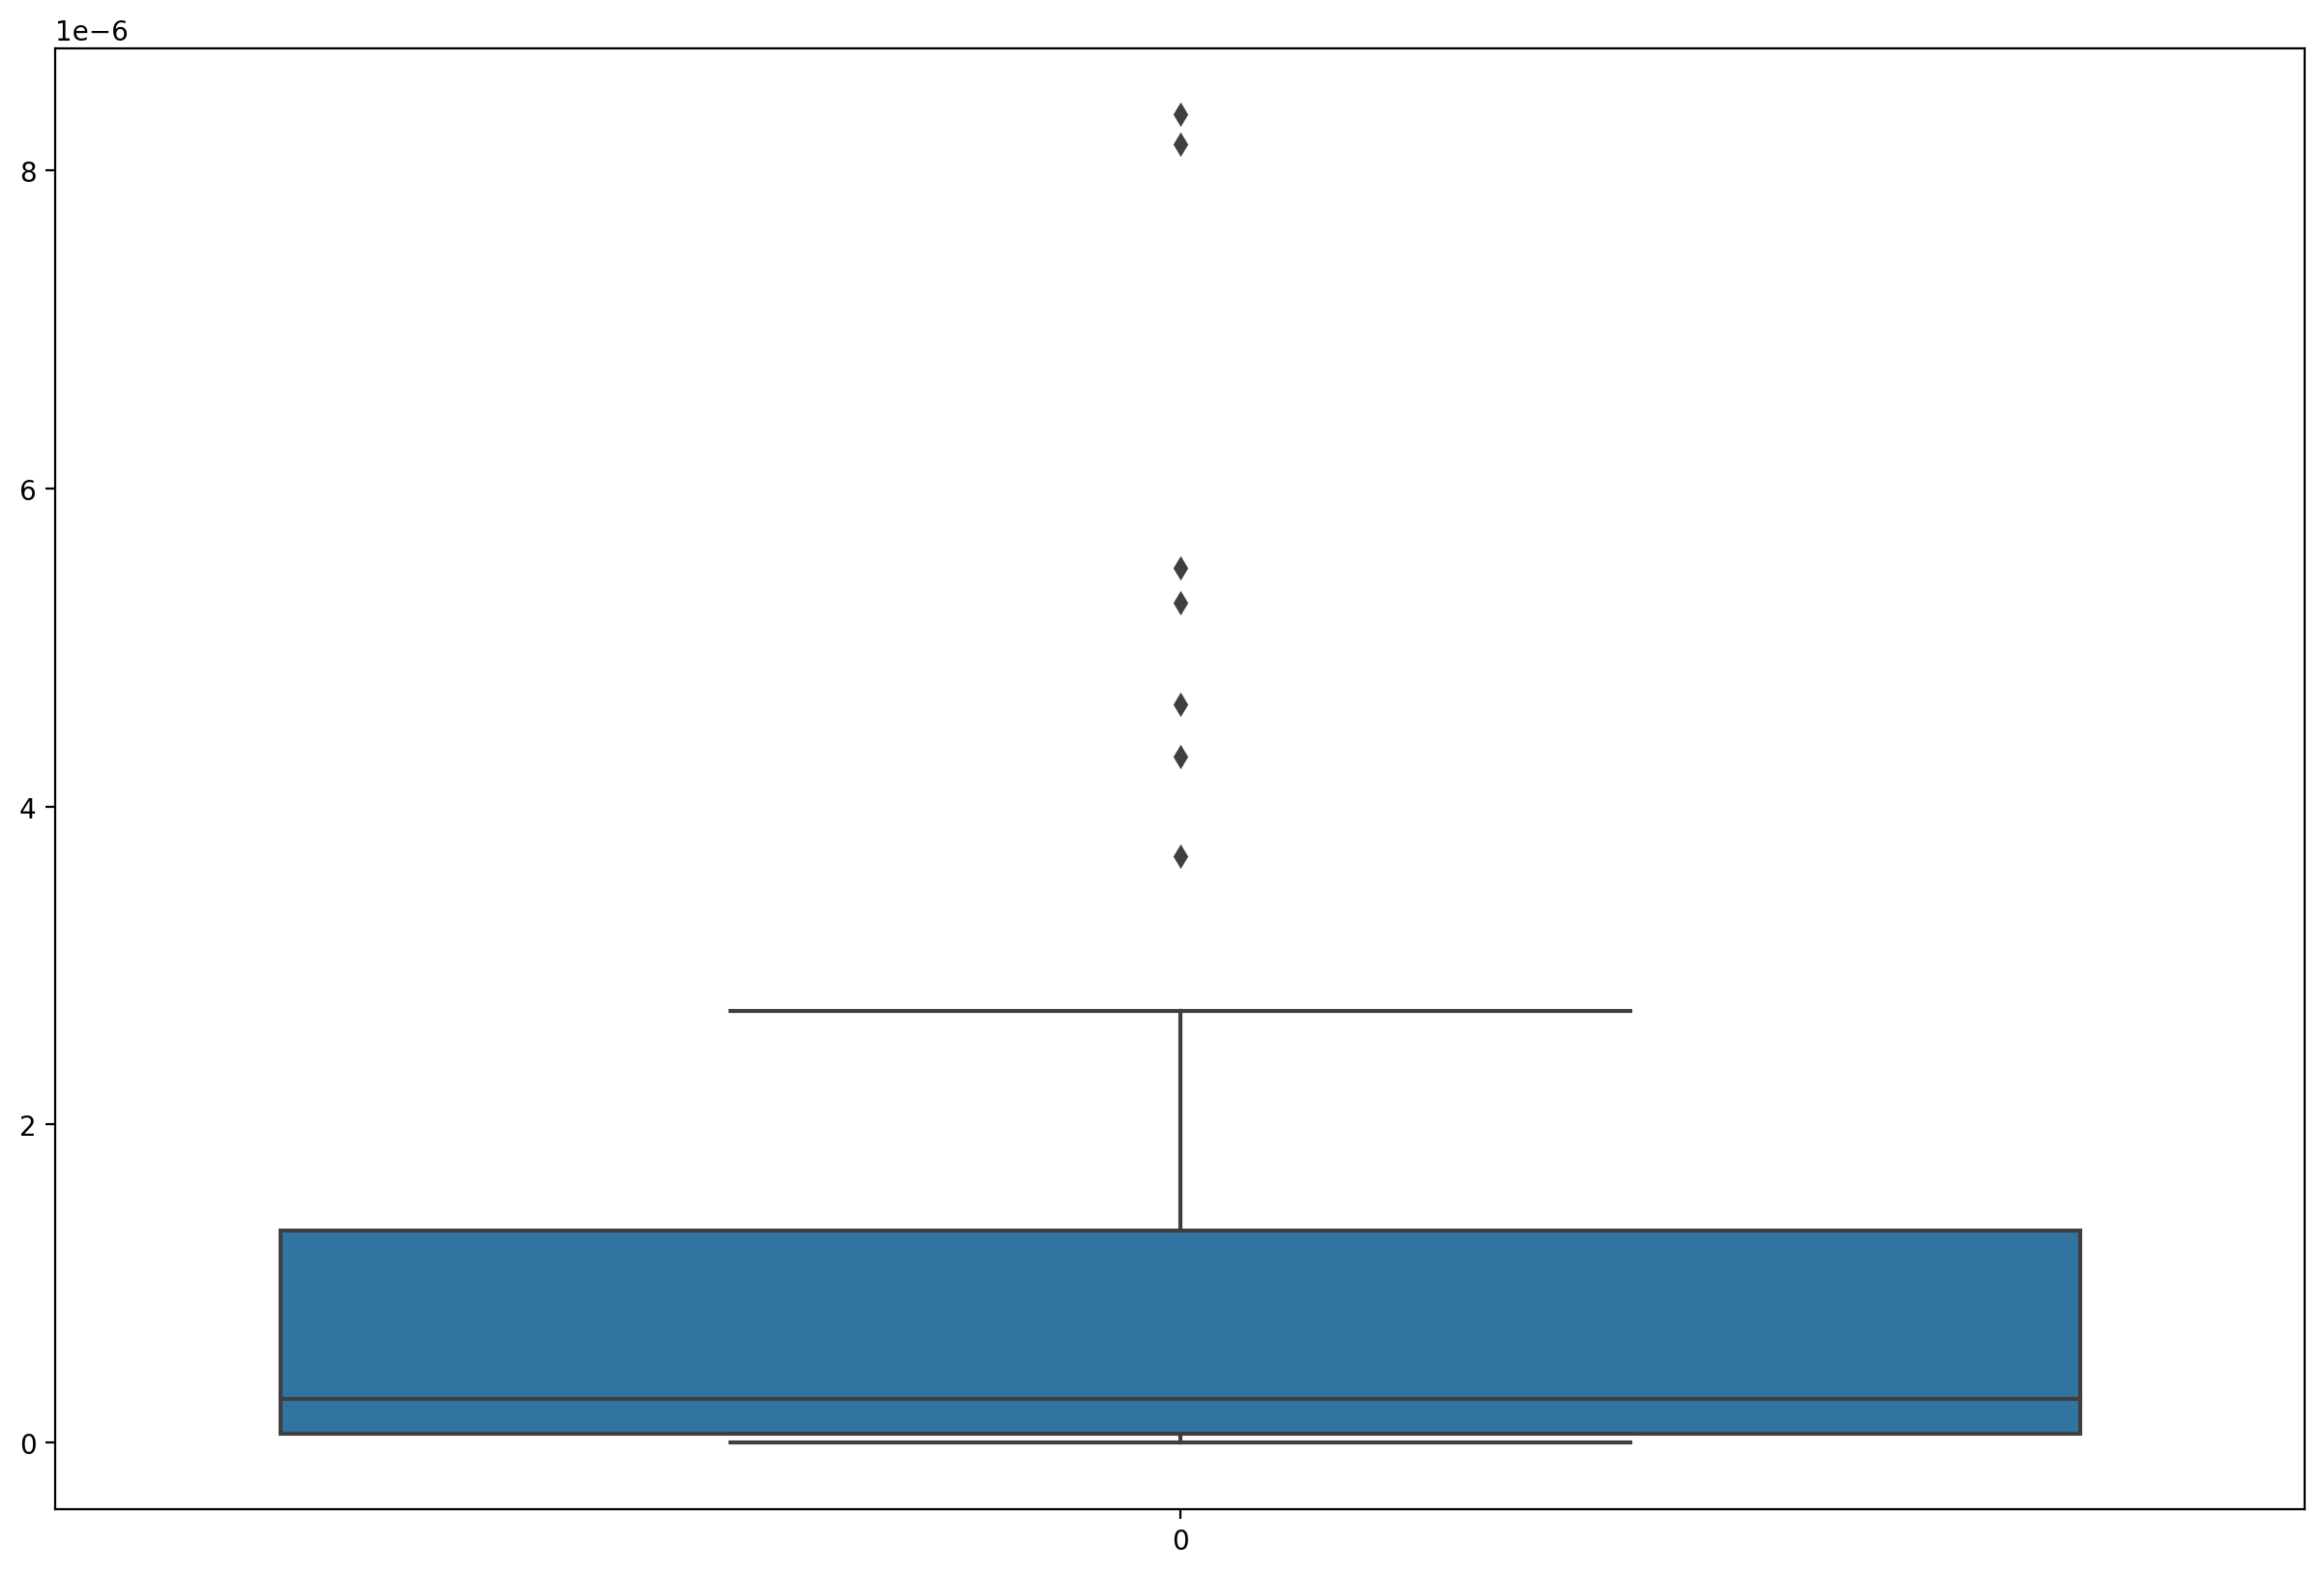

In [15]:
sns.boxplot(diffs['dPower'])

In [17]:
t_ppl_vo, p_ppl_vo = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'c')])
print(f'Differences for group deltas in visual only for tremor is t[{df_vo}]={t_ppl_vo:.2f}, p:{p_ppl_vo:.3f}')
t_ppl_av, p_ppl_av = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv-visual for tremor is t[{df_va}]={t_ppl_av:.2f}, p:{p_ppl_av:.3f}')
t_ppl_ao, p_ppl_ao = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv only for tremor is t[{df_ao}]={t_ppl_ao:.2f}, p:{p_ppl_ao:.3f}')



Differences for group deltas in visual only for tremor is t[54]=20.00, p:0.442
Differences for group deltas in auditiv-visual for tremor is t[54]=nan, p:nan
Differences for group deltas in auditiv only for tremor is t[54]=24.00, p:0.871


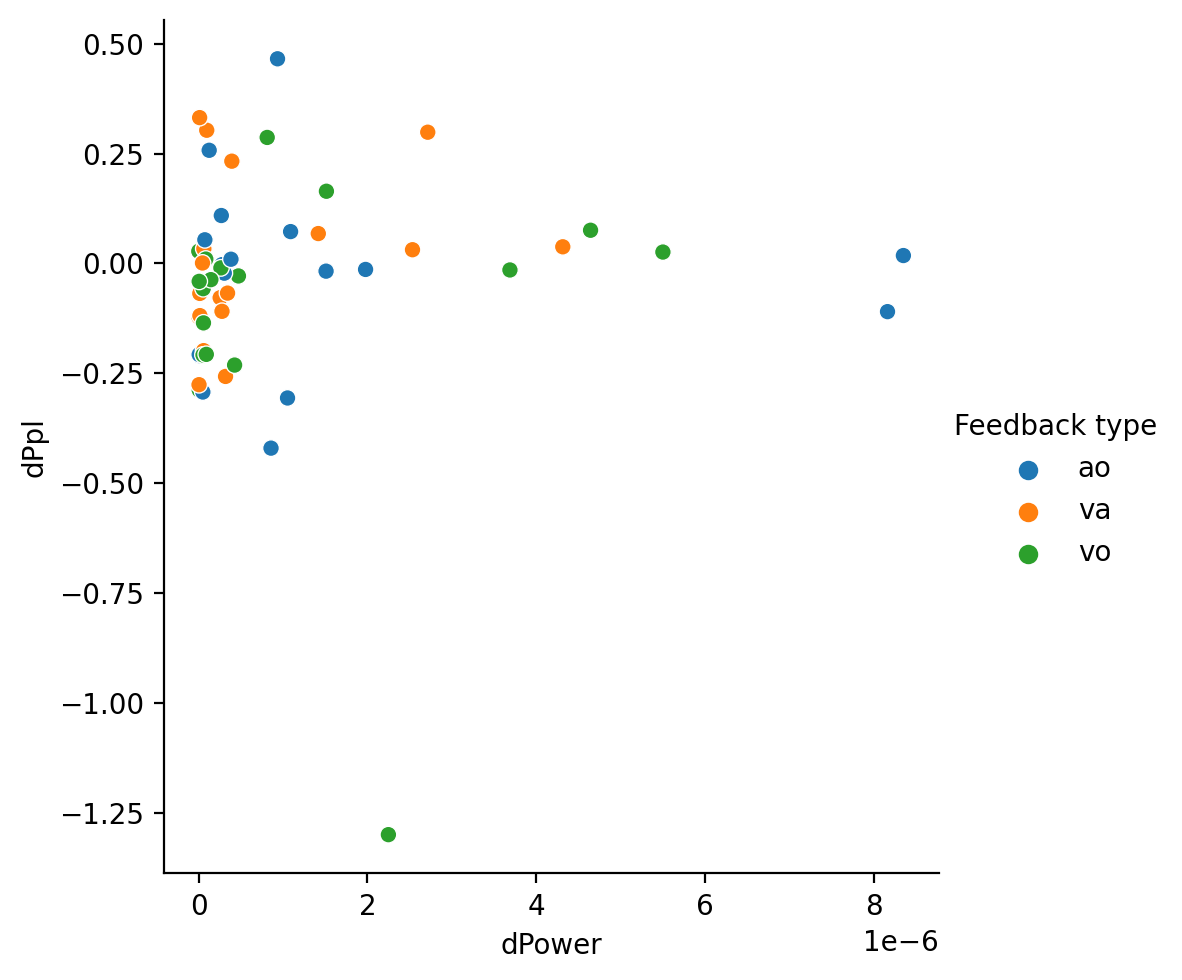

In [18]:
sns.relplot(
        data=diffs,x='dPower',y='dPpl',
        hue='Feedback type'
    )

<AxesSubplot:xlabel='Feedback type', ylabel='dPower'>

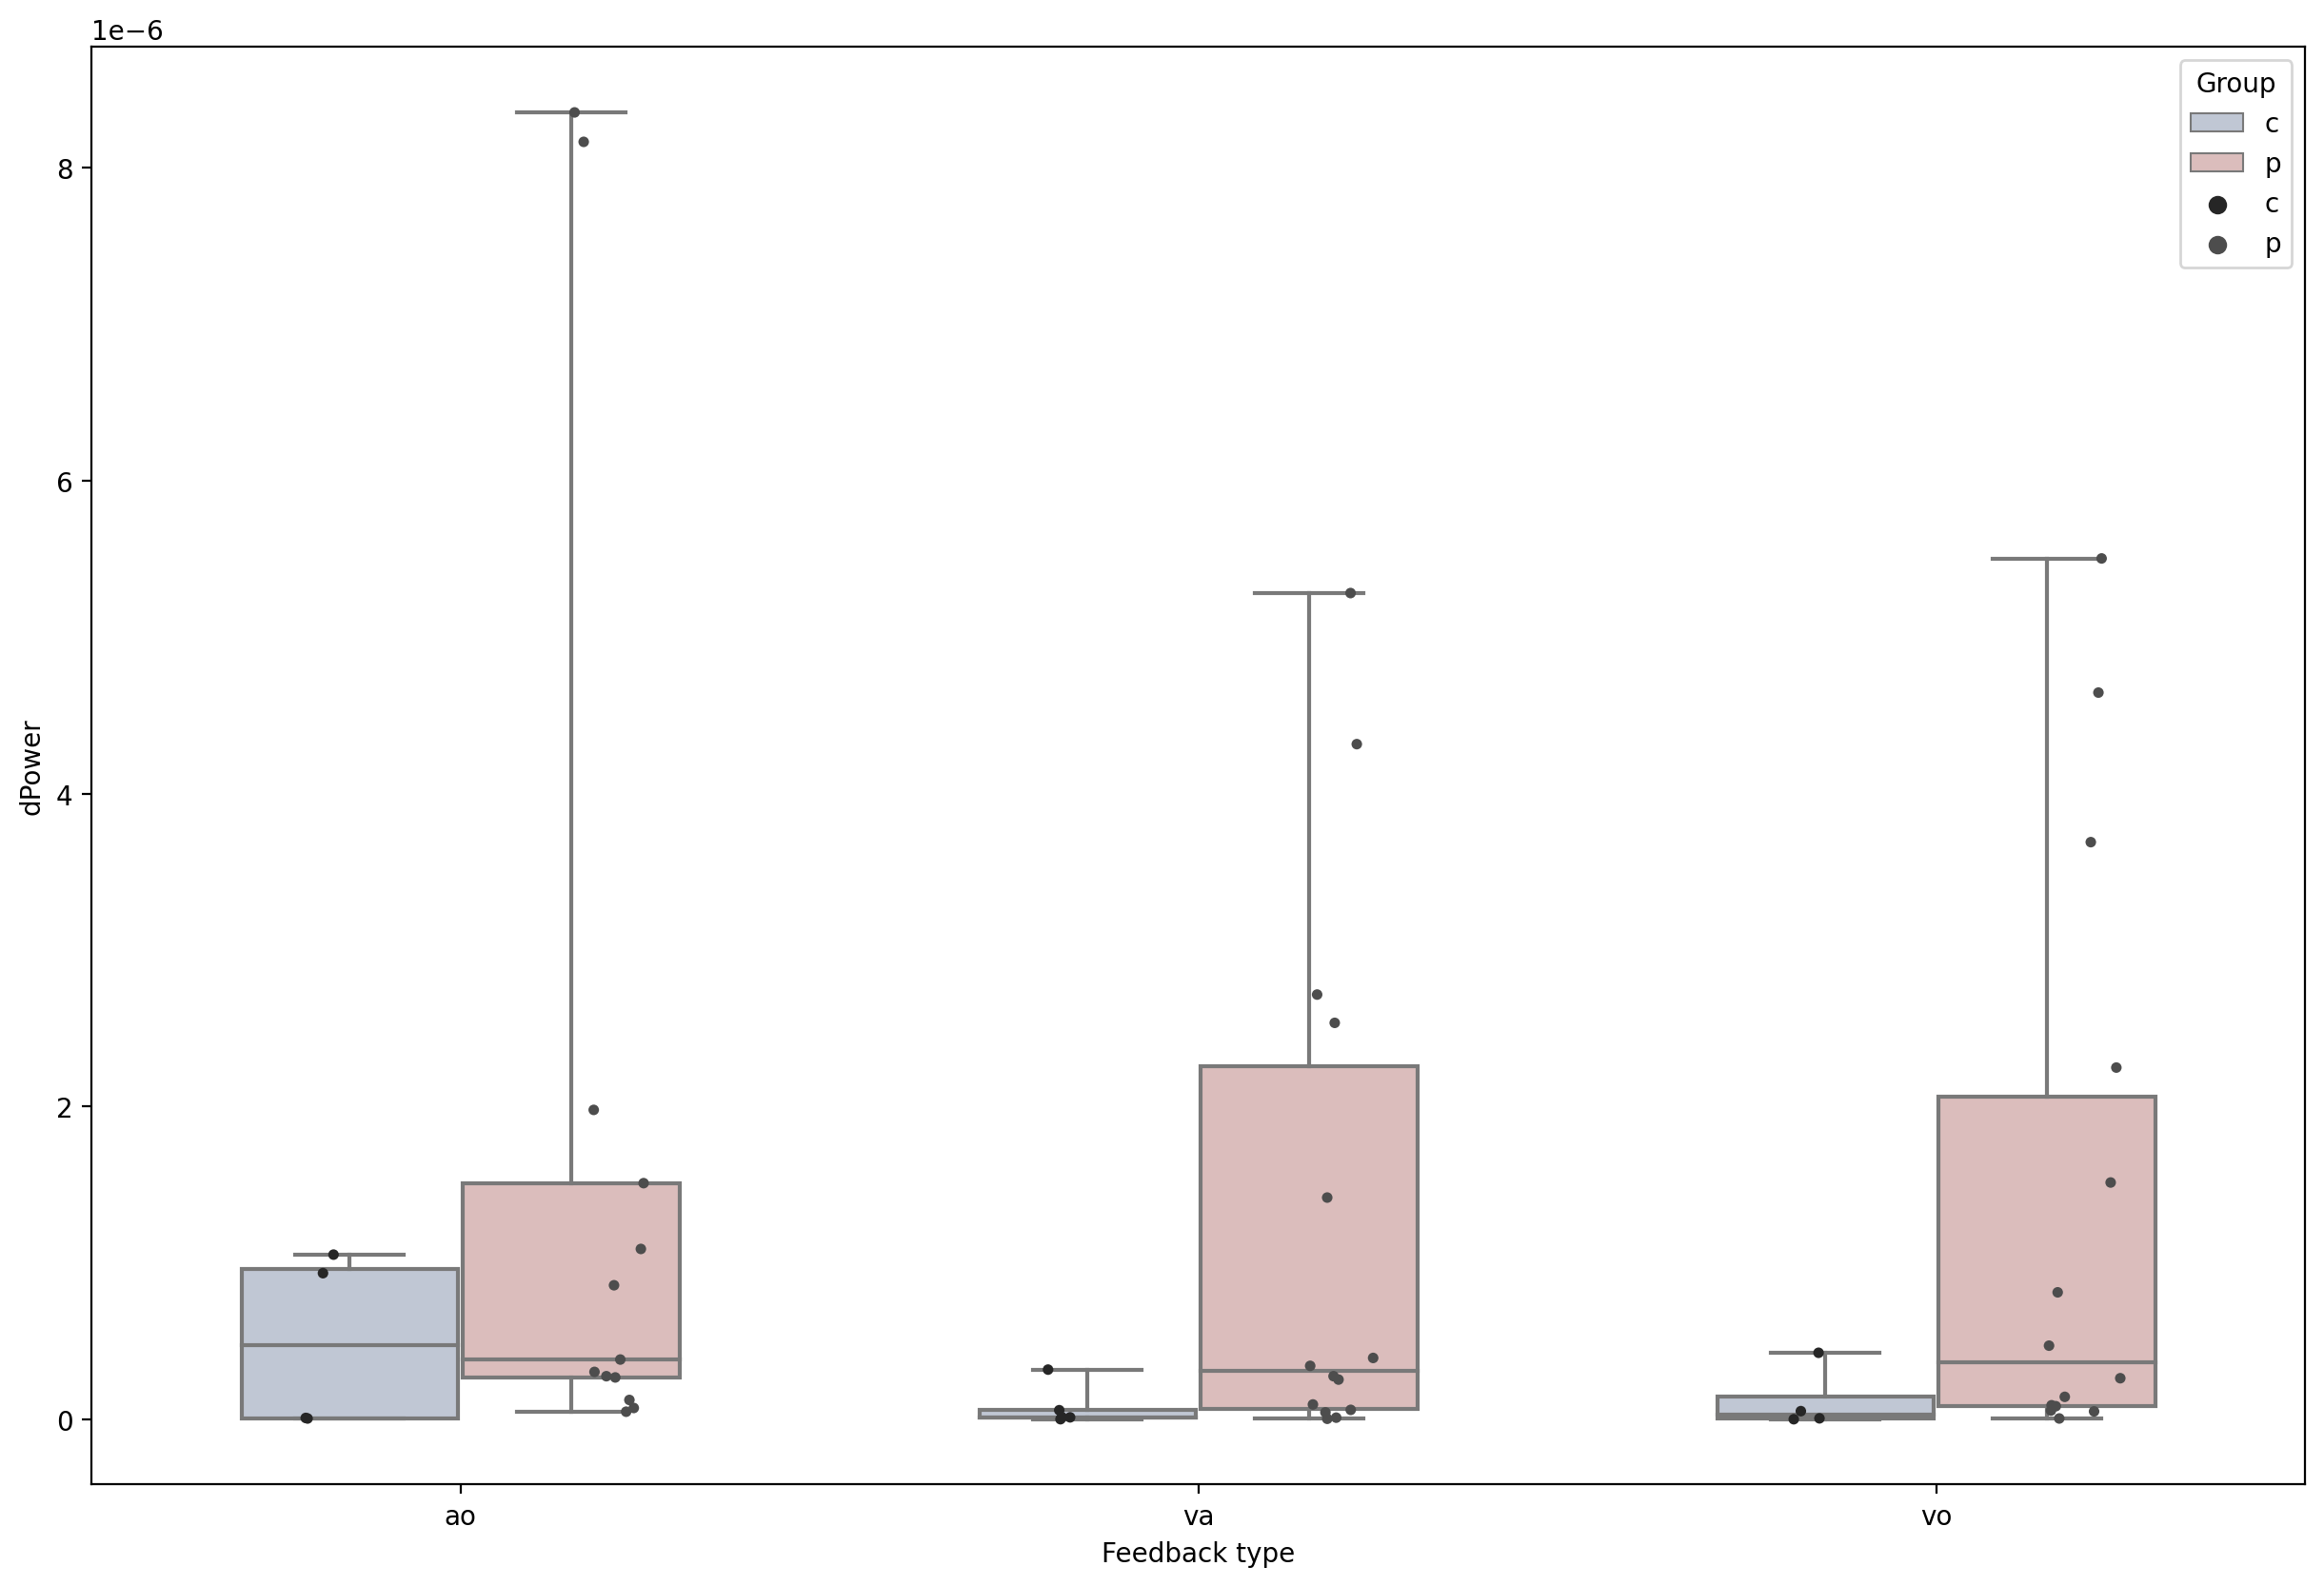

In [19]:
sns.boxplot(data = diffs, x = 'Feedback type', y = 'dPower', hue='Group',whis=[0, 100], width=.6,palette="vlag")
sns.stripplot(data = diffs, x = 'Feedback type', y = 'dPower', hue='Group',size=4, color=".3", linewidth=0,dodge=True)

<AxesSubplot:xlabel='dPower', ylabel='Count'>

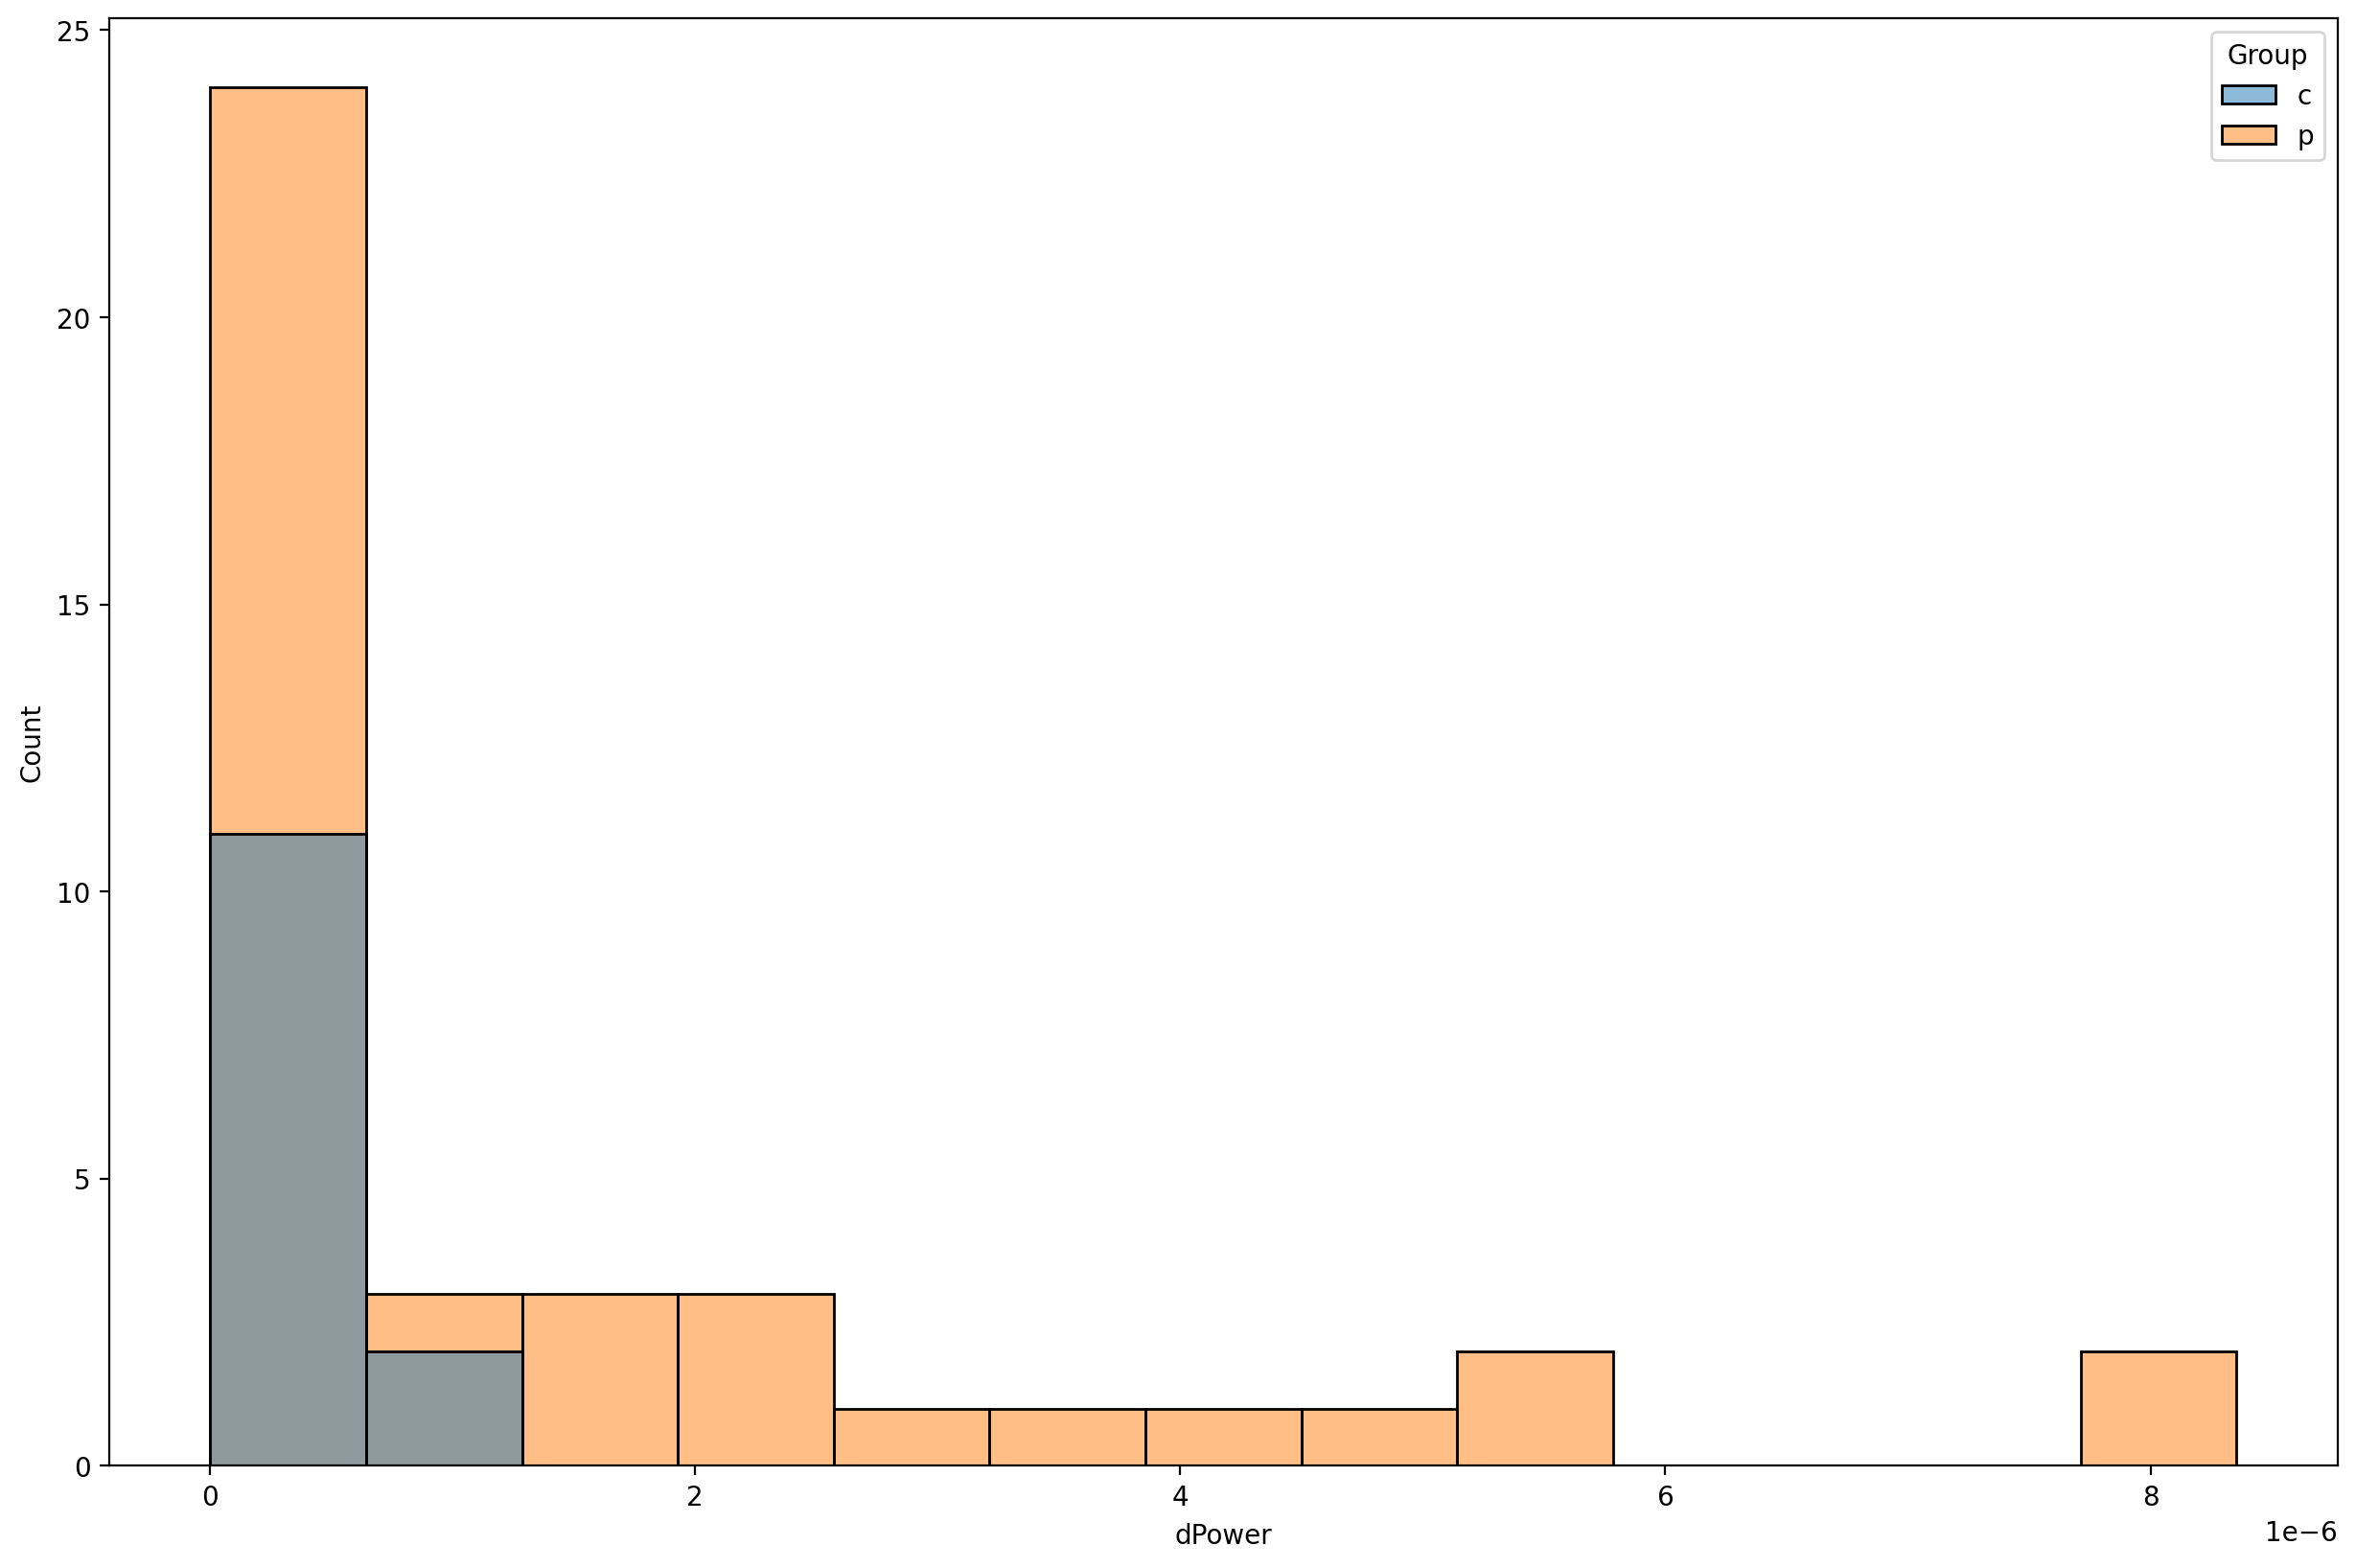

In [20]:
from tokenize import group


sns.histplot(data = diffs,x = 'dPower', hue='Group')